# Lab 2

**Goal**: In this lab we will learn how to import our own data into python, build networks, and explore how our modeling choices can affect the analysis and interpretation of the data.

**Before we get started**:
1. In GitHub Desktop, make a new branch titled `comp-activity-2` for your repository `BIOL4559homework`.
2. Put this notebook in the repository.
3. Activate your conda environment by running `conda activate biol4559` and run jupyter using `jupyter notebook`.

**After the completion of this lab**
1. List the people with whom you worked on this lab.
2. Make a pull request and title it "Grade Computational Activity 2".
3. Assign @AbhayGupta115 as a reviewer.
4. Submit the pull request.

**How you will be graded**

This activity is out of 10 points. You will be graded on two things: completion, clear documentation, and correctness of your process.

* *Completion (4pts)*: This is solely whether you attempted and completed all portions of the computational assignment.
* *Documentation (4pts)*: Write comments above your code, describing what it does to demonstrate that you understand what the code is doing. ** Examples of good and bad documentation below.
* *Correctness (2pts)*: Does your code run and produce the correct output?


# Polars

The two main libraries used for data analysis in python are pandas and polars. Pandas is the more widely used library, but polars is faster and more efficient for larger datasets. Here we will use polars to import and prepare our data for use in networkx.

Lets start by importing the necessary libraries.

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import networkx as nx

To import data using polars, we use the `read_csv` function. This function takes in the file path of the data and returns a polars dataframe. Here we will import the beetle data (cook_social_2020.csv) provided to you.

In [2]:
df = pl.read_csv("cook-social-2020.csv")
print(df)

shape: (75_731, 9)
┌──────────────┬───────┬──────────┬─────┬───┬───────────┬──────────────┬────────────┬──────────────┐
│ datetime     ┆ condo ┆ focal_id ┆ sex ┆ … ┆ grid_cell ┆ cell_locatio ┆ partner_id ┆ partner_inte │
│ ---          ┆ ---   ┆ ---      ┆ --- ┆   ┆ ---       ┆ n            ┆ ---        ┆ raction      │
│ str          ┆ str   ┆ str      ┆ str ┆   ┆ str       ┆ ---          ┆ str        ┆ ---          │
│              ┆       ┆          ┆     ┆   ┆           ┆ str          ┆            ┆ str          │
╞══════════════╪═══════╪══════════╪═════╪═══╪═══════════╪══════════════╪════════════╪══════════════╡
│ 2018-06-27T0 ┆ 6B    ┆ 3PS      ┆ F   ┆ … ┆ A02       ┆ C            ┆ null       ┆ null         │
│ 6:26:00Z     ┆       ┆          ┆     ┆   ┆           ┆              ┆            ┆              │
│ 2018-06-27T0 ┆ 6B    ┆ 3HO      ┆ F   ┆ … ┆ W         ┆ null         ┆ null       ┆ null         │
│ 6:27:00Z     ┆       ┆          ┆     ┆   ┆           ┆              ┆

Now that we have our data imported, we can start to explore it. The beetle data contains observations of social interactions between beetles. Each row in the dataframe represents an interaction between two beetles, identified by their `focal_id` and `partner_id`. The `condo` column indicates the location of the interaction, and the `datetime` column indicates when the interaction occurred.

For now the datetime column is represented as string. We need to convert it to a datetime object so that we can filter the data by date. We can do this using the `to_datetime` function. We then replace the existing datetime column with the new datetime object.

In [3]:
new_col = df["datetime"].str.to_datetime("%Y-%m-%dT%H:%M:%S%Z", strict=False)
df.replace_column(0, new_col).drop_nulls()


datetime,condo,focal_id,sex,behavior,grid_cell,cell_location,partner_id,partner_interaction
datetime[μs],str,str,str,str,str,str,str,str
2018-06-27 06:32:00,"""6B""","""2MO""","""M""","""CRT""","""C01""","""B""","""3TL""","""Mating Partners"""
2018-06-27 06:32:00,"""6B""","""3TL""","""F""","""CRT""","""C01""","""B""","""2MO""","""Mating Partners"""
2018-06-27 06:32:00,"""6B""","""3TL""","""F""","""CRT""","""C01""","""B""","""3VX""","""5 CM Partners"""
2018-06-27 06:32:00,"""6B""","""3VX""","""F""","""S""","""C01""","""T""","""3TL""","""5 CM Partners"""
2018-06-27 06:32:00,"""6B""","""3VX""","""F""","""S""","""C01""","""T""","""2MO""","""5 CM Partners"""
…,…,…,…,…,…,…,…,…
2020-08-18 22:00:00,"""6B""","""5YN""","""F""","""CRT""","""B18""","""C""","""4K2""","""Mating Partners"""
2020-08-22 23:21:00,"""6B""","""4AW""","""M""","""CRT""","""C18""","""B""","""5AS""","""Mating Partners"""
2020-08-22 23:21:00,"""6B""","""5AS""","""F""","""CRT""","""C18""","""B""","""4AW""","""Mating Partners"""


Our data also contains information about unknown beetles, identified by the `focal_id` and `partner_id` values of 'UK', 'UKM', and 'UKF' (look at the ReadMe file). We will filter these out of our data using the `filter` function. This funtion takes in a boolean (True/False) expression and returns a new dataframe with only the rows that satisfy the expression. We can use bitwise operators to combine multiple boolean expressions as well.

Bitwise operators are used to combine multiple boolean expressions. The most common bitwise operators are:
* & (and): Returns True if both expressions are True
* | (or): Returns True if either expression is True
* ~ (not): Returns True if the expression is False



In [4]:
bad_values = ['UK', 'UKM', 'UKF']
df = df.filter(~pl.col("focal_id").is_in(bad_values))
df = df.filter(~pl.col("partner_id").is_in(bad_values))

Now that we have cleaned our data, we can start choosing which data we want to use to build our networks. For this lab, we will focus on the interactions that took place in condo '6B' during the month of July 2018. We can filter our data using the `filter` function again.

In [5]:
# Filtering only when condo is 6B
df_6B = df.filter(pl.col('condo') == '6B')

# Filtering for July in 2018
df_6B_2018 = df_6B.filter(pl.col('datetime').dt.year() == 2018) # Filter for 2018
df_6B_2018 = df_6B_2018.filter(pl.col('datetime').dt.month() == 7) # Filter for July

We can use a one-line function to do the above task using bitwise operators.

In [ ]:
# You can also make use of bitwise operators to do it all at once
df_6B_2018 = df.filter((pl.col('condo') == '6B') & (pl.col('datetime').dt.year() == 2018) 
                       & ((pl.col('datetime').dt.month() == 7)))

# Think as (Condition 1) & (Condition 2) & (Condition 3), only return TRUE if all three are TRUE for a row.

# Creating Networks

Now that we have our data filtered, we can start to build our networks. We will use the networkx library to build our networks. The first step is to create an empty graph using the `Graph` function (Just like in Lab 1).

In [7]:
G = nx.Graph()

Now we will add nodes to our graph. We will add all the unique `focal_id` values as nodes in our graph. We can do this using the `add_nodes_from` function to add all the nodes at once.

In [8]:
G.add_nodes_from(df_6B_2018["focal_id"].to_list())

Now we will add edges to our graph. We will add an edge between two nodes if there is an interaction between them. We can do this using the `add_edges_from` function to add all the edges at once. For now we will edges for all types of interactions. We will filter for specific types of interactions later. We use `rows()` to convert the polars dataframe to a list of tuples, which is the format that the `add_edges_from` function expects.

A faster function to use would be the `iter_rows` function, which returns an iterator over the rows of the dataframe. This is more memory efficient than converting the entire dataframe to a list of tuples.

In [ ]:
# Lets create a list of all the edges
edge_list = (df_6B_2018['focal_id', 'partner_id']).rows()

# or
edge_list = df_6B_2018['focal_id', 'partner_id'].iter_rows()

# Adding all edges to the network
G.add_edges_from(edge_list)

We can now draw the network using the `draw` function. This function takes in the graph and some optional parameters to customize the appearance of the graph.

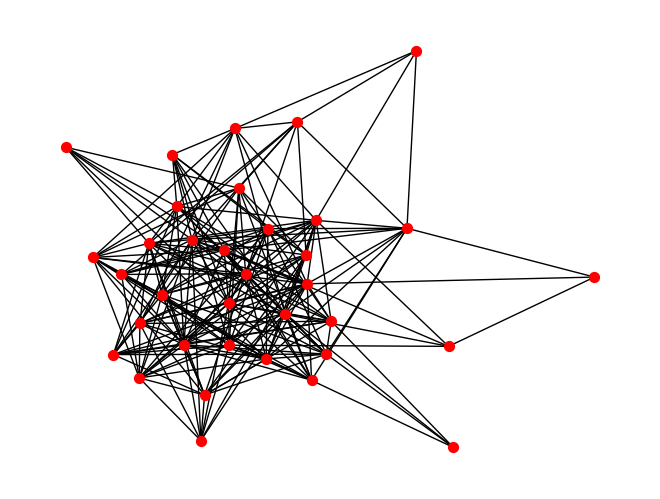

In [10]:
nx.draw(G, with_labels = False, node_size = 50, node_color='red')

Lets print some statistics about our network, like the mean degree, clustering coefficient and the density of the network.

In [11]:
n = G.number_of_nodes() # Calculating number of nodes
m = G.number_of_edges() # Calculating number of edges

k_list = [] # Empty list to store degree of nodes
for j in G.nodes: # Looping over all nodes
    k_list.append(G.degree[j]) # Adding degree of each node to the list

k_G = sum(k_list)/len(k_list) # Finding mean degree
print(f"Mean degree of network: {k_G}")

density_G = m / (n * (n-1) / 2) # Finding density
print(f"Density of network: {density_G}")

CC_G = nx.average_clustering(G) # Finding average CC
print(f"Mean CC of network: {CC_G}")

Mean degree of network: 12.857142857142858
Density of network: 0.37815126050420167
Mean CC of network: 0.4791321877788043


Seems like our network is very well connected. This is likely because we included all types of interactions in our network. Let's try filtering for specific types of interactions and see how that affects the network. Let's start by filtering for only "Touch Partners" interactions.

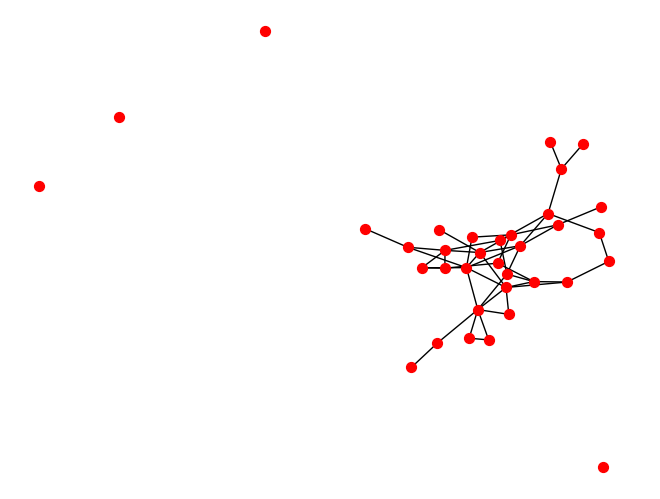

In [12]:
# Filtering edges for only 'Touch Partners'
touching_edge_df = df_6B_2018.filter(pl.col('partner_interaction') == 'Touch Partners')
touching_edge_list = (touching_edge_df['focal_id', 'partner_id']).rows()

# Empty graph for the new touch network
Touch_G = nx.Graph()
Touch_G.add_nodes_from(df_6B_2018["focal_id"]) # Adding nodes (Why do we add from df_6B_2018 and not touching_edge_df)

Touch_G.add_edges_from(touching_edge_list) # Adding edges

nx.draw(Touch_G, with_labels = False, node_size = 50, node_color='red')

Lets reuse the previous code to print out the new statistics for this network.

In [13]:
# Refactoring the previous code cell with stats
n = Touch_G.number_of_nodes()
m = Touch_G.number_of_edges()

k_list = []
for i in Touch_G.nodes:
    k_list.append(Touch_G.degree[i])

k_G = sum(k_list)/len(k_list)
print(f"Mean degree of network G: {k_G}")

density_G = m / (n * (n-1) / 2)
print(f"Density of network G: {density_G}")

CC_G = nx.average_clustering(Touch_G)
print(f"Mean CC of network G: {CC_G}")

Mean degree of network G: 2.742857142857143
Density of network G: 0.08067226890756303
Mean CC of network G: 0.14435374149659863


Now the network is much less connected. On average it seems like each beetle only touches 5 other beetles. This is likely a more accurate representation of the social structure of the beetles. We can also try filtering for other types of interactions and see how that affects the network.

Then we can start having some fun, we can try and figure out if there is any correlation between the different types of interactions. For example, do beetles that touch each other also tend to be mates? We can use the Jaccard index to calculate the similarity between the two networks. The Jaccard index is defined as the number of edges in the intersection of the two networks (i.e. present in both networks) divided by the number of edges in the union of the two networks (i.e. all the edges present in total from both networks).

Here is an example of how to calculate the Jaccard index using two example networks.
```python
# Creating network 1
G1 = nx.Graph()
G1.add_nodes_from([1, 2, 3, 4, 5]) # Adding nodes
G1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)]) # Adding edges

# Creating network 2
G2 = nx.Graph()
G2.add_nodes_from([1, 2, 3, 4, 5]) # Adding nodes
G2.add_edges_from([(2, 3), (3, 4), (4, 5)]) # Adding edges

# Calculating Jaccard index
edges_G1 = set(G1.edges())
edges_G2 = set(G2.edges())

intersection_size = len(edges_G1.intersection(edges_G2)) # Number of edges in both networks
union_size = len(edges_G1.union(edges_G2)) # Number of edges in either network
jaccard_index = intersection / union

print(f'Jaccard index: {jaccard_index}')
```

## Graded Activity

* Load the data from CookSocial2020 dataset and clean the data to remove any bad values (like unknown males, females).
* Create a network for the year 2020, and a condo of your choosing (mention which condo you chose).
* Draw the network for different mating interactions (Mating Partners, Touch Partners, and 5 CM Partners), try to remove any isolates. Tell us what do you think, should isolates be considered while analysing networks or not and why? (Hint: Check the documentation for networkx to see how to remove isolates).
* Check how the network statistics (degree, clustering coefficient, and density) change with different mating interactions.
* What do these statistics tell you?
* What would these different representations of the same data be useful for? State applications for each type of network you draw.

(Optional, Ungraded activity) Check whether different interactions have a correlation, does a beetle with more Touch partners also get more Mates? (Hint: Calculate the Jaccard similarity between the edges of the two networks).

# My Solutions

In [22]:
# Imports, done already but for show.
import polars as pl
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
# Load CSV with Polars
df = pl.read_csv('cook-social-2020.csv')

In [ ]:
# Changing datetime column to actual datetime objects, like in class.
dt_parsed = df["datetime"].str.to_datetime("%Y-%m-%dT%H:%M:%S%Z", strict=False)
df = df.with_columns(pl.col("datetime").str.to_datetime("%Y-%m-%dT%H:%M:%S%Z", strict=False)).drop_nulls("datetime")

In [25]:
# Removing bad data, like in class.
bad = ["UK", "UKM", "UKF"]
df = df.filter(~pl.col("focal_id").is_in(bad) & ~pl.col("partner_id").is_in(bad))

In [ ]:
# Filtering like before, little cleaner.
TARGET_YEAR = 2020
TARGET_CONDO = '6B'

df_2020 = df.filter(
    (pl.col('datetime').dt.year() == TARGET_YEAR) &
    (pl.col('condo') == TARGET_CONDO)
)

# Just a quick check of some set of 10 entries to see if any are null/bad.
print(df_2020.sample(10))

shape: (10, 9)
┌──────────────┬───────┬──────────┬─────┬───┬───────────┬──────────────┬────────────┬──────────────┐
│ datetime     ┆ condo ┆ focal_id ┆ sex ┆ … ┆ grid_cell ┆ cell_locatio ┆ partner_id ┆ partner_inte │
│ ---          ┆ ---   ┆ ---      ┆ --- ┆   ┆ ---       ┆ n            ┆ ---        ┆ raction      │
│ datetime[μs] ┆ str   ┆ str      ┆ str ┆   ┆ str       ┆ ---          ┆ str        ┆ ---          │
│              ┆       ┆          ┆     ┆   ┆           ┆ str          ┆            ┆ str          │
╞══════════════╪═══════╪══════════╪═════╪═══╪═══════════╪══════════════╪════════════╪══════════════╡
│ 2020-08-12   ┆ 6B    ┆ 5XW      ┆ F   ┆ … ┆ A01       ┆ T            ┆ 5X2        ┆ 5 CM         │
│ 22:04:00     ┆       ┆          ┆     ┆   ┆           ┆              ┆            ┆ Partners     │
│ 2020-08-18   ┆ 6B    ┆ 5HA      ┆ F   ┆ … ┆ B18       ┆ C            ┆ 4NZ        ┆ Mating       │
│ 08:21:00     ┆       ┆          ┆     ┆   ┆           ┆              ┆    

I started doing the interactions one by one but made a function to make the process easier. We can now compare and contrast.

In [45]:
def network_interactions(network: str):
    # Build 'Mating Partners' network (remove isolates).
    mate_df = df_2020.filter(pl.col('partner_interaction') == f'{network}')

    G_mate = nx.Graph()
    G_mate.add_nodes_from(pl.concat([mate_df['focal_id'], mate_df['partner_id']]).to_list())
    G_mate.add_edges_from(mate_df.select(["focal_id","partner_id"]).rows())

    # Removing isolates.
    G_mate.remove_nodes_from(list(nx.isolates(G_mate)))

    # Get the stats.
    n = G_mate.number_of_nodes()
    m = G_mate.number_of_edges()
    mean_deg = (sum(dict(G_mate.degree()).values()) / n ) # sum the dict values divide by n. 
    density = (2 * m)/(n * (n-1)) # density formula
    cc = nx.average_clustering(G_mate) # clustering coeff.

    # Draw it up.
    plt.figure(figsize=(6,6))
    pos = nx.spring_layout(G_mate, seed = 1)
    nx.draw(G_mate, pos, node_size = 40, with_labels = False)
    plt.title(f'{network} — {TARGET_CONDO} — {TARGET_YEAR}\nNodes: {n} | Edges: {m} | Mean Deg: {mean_deg:.3f} | Density: {density:.3f} | AvgCC: {cc:.3f}')
    plt.show()

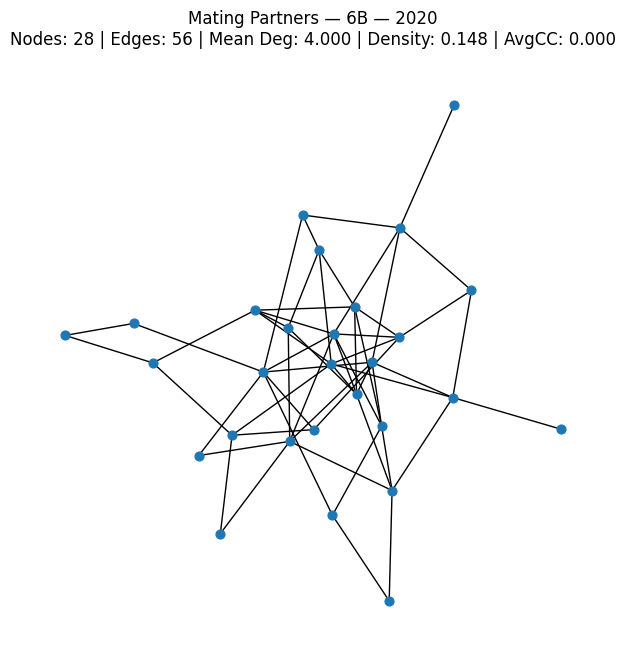

In [46]:
network_interactions('Mating Partners')

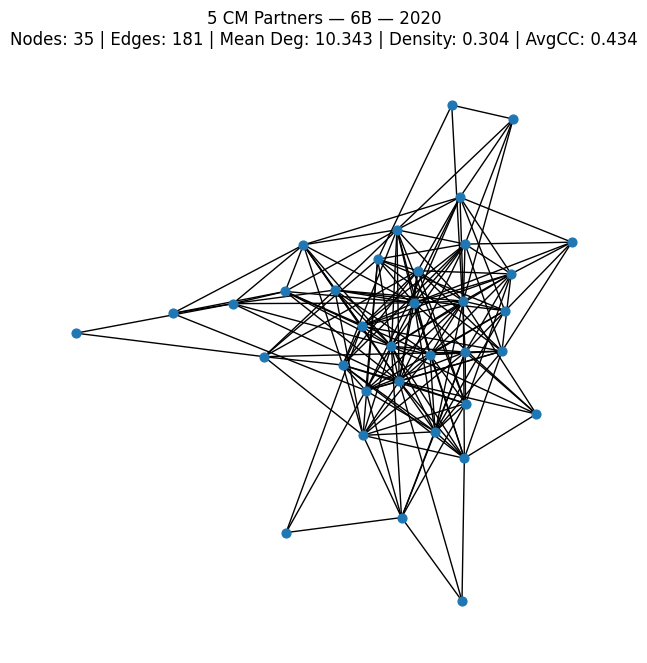

In [47]:
network_interactions('5 CM Partners')

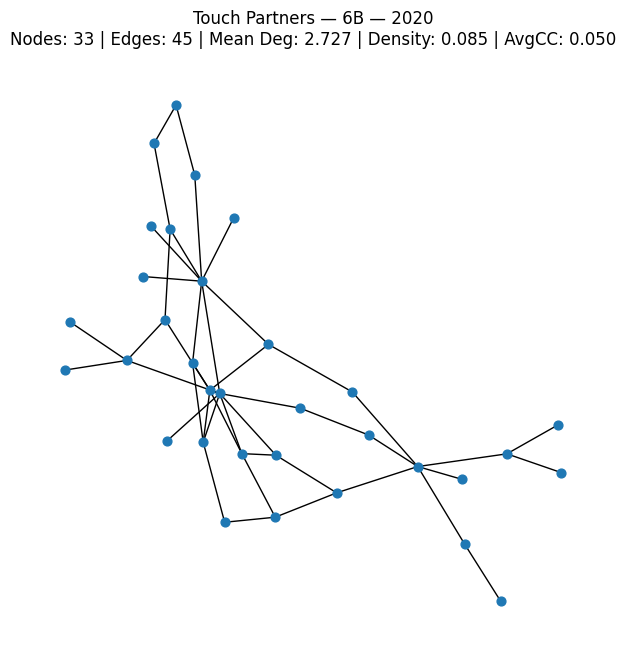

In [48]:
network_interactions('Touch Partners')

### Isolates?
I removeed isolates for the visual/stat comparisons because isolates can inflate the node counts while depressing density/mean degrees that just aren't relevant to the structure of the network. I'd probably report both but have a preference towards without.

### Stats!
`Touch Partners` has lower density and lowest mean degree, then `Mating Partners`, then `5 CM Partners`. The average clustering coefficient reflects local triangle closure (higher means tightly knit subgroups). If `5 CM Partners` is showing more clustering then that suggests maybe more is pulling them together than just mating pairs.